Four Classes Rotating with Expansion V2. Bidimensional.
100 batches of 1738 instances



METHOD: Static lp as classifier
Execution time:  4.192840615174078
Average error: 79.6064
Average macro-F1: 0.20436145309843948
Average micro-F1: 0.2059
Average Accuracy:  20.3936
Standard Deviation:  31.0946321901
Variance:  966.87615104


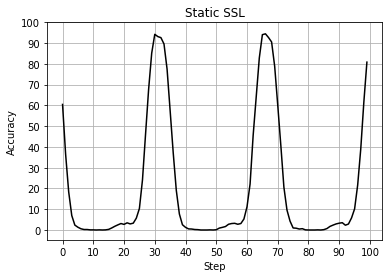

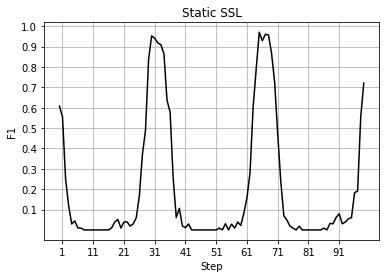

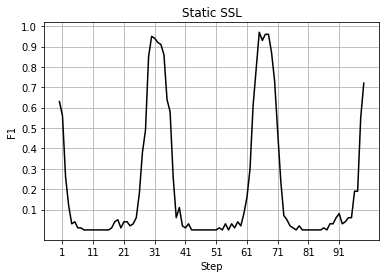




METHOD: Sliding lp as classifier


C:\Users\raul\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Execution time:  3.3753408887542165
Average error: 82.8774
Average macro-F1: 0.12599235790165383
Average micro-F1: 0.17939999999999998
Average Accuracy:  17.1226
Standard Deviation:  19.5004367961
Variance:  380.26703524


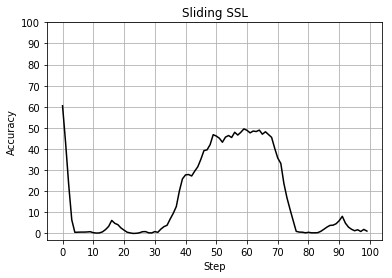

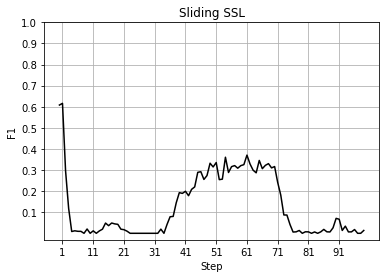

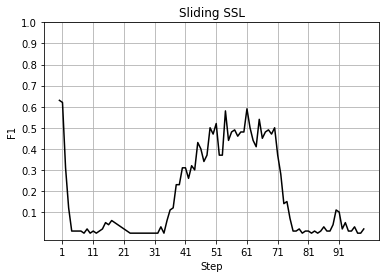




METHOD: Incremental lp as classifier
Execution time:  138.93893375252
Average error: 79.67
Average macro-F1: 0.2039243426605842
Average micro-F1: 0.20559999999999998
Average Accuracy:  20.33
Standard Deviation:  30.985097418
Variance:  960.076262


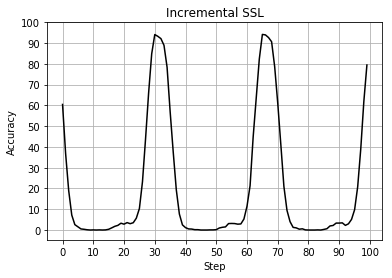

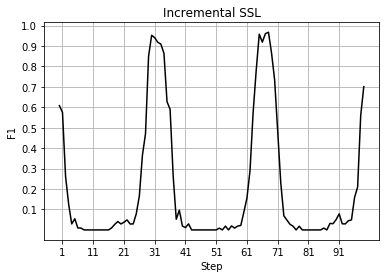

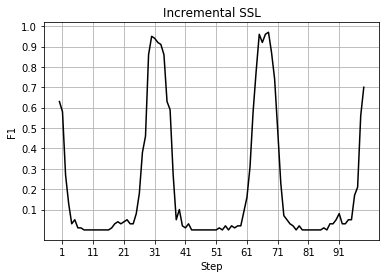




METHOD: lp as classifier and kde as core support extraction with cutting data method
Execution time:  19.232675463634365
Average error: 69.97
Average macro-F1: 0.30358484728552304
Average micro-F1: 0.3077
Average Accuracy:  30.03
Standard Deviation:  19.20683873
Variance:  368.902654


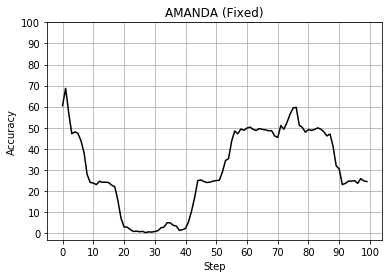

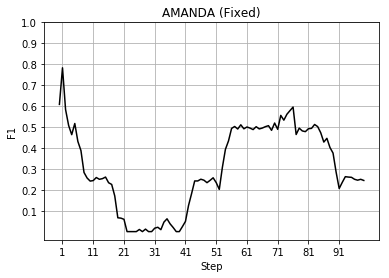

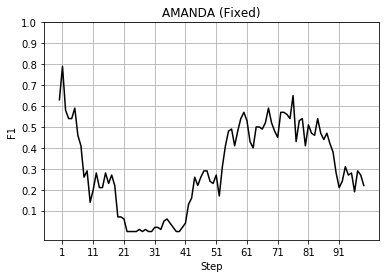




METHOD: lp as classifier and kde and Hellinger distance as dynamic CSE
Execution time:  21.341977148848542
Average error: 78.5942
Average macro-F1: 0.18101357891363073
Average micro-F1: 0.21709999999999996
Average Accuracy:  21.4058
Standard Deviation:  25.2857327036
Variance:  639.36827836


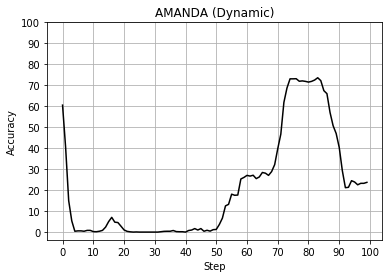

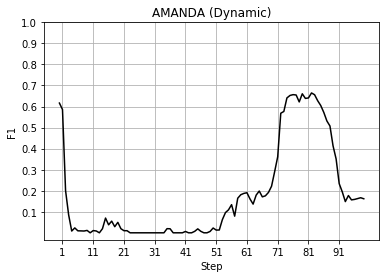

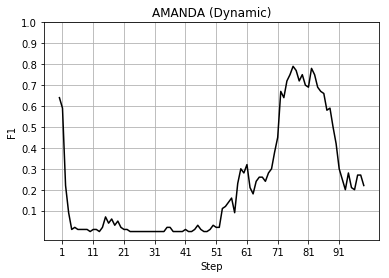




METHOD: None as classifier and GMM with BIC and Mahalanobis as core support extraction
Execution time:  70.90456813646688
Average error: 77.3807
Average macro-F1: 0.19715294671923492
Average micro-F1: 0.22750000000000004
Average Accuracy:  22.6193
Standard Deviation:  26.9282317375
Variance:  725.12966451


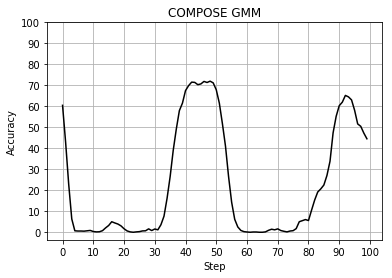

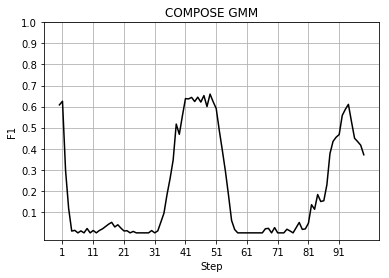

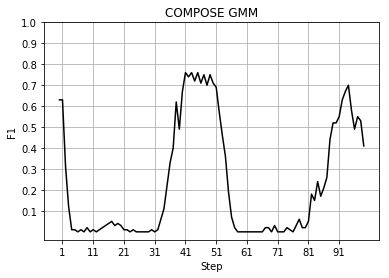




Method: Level IW
Execution time:  70.90456813646688
Average macro-F1: 0.2464583081593816
Average micro-F1: 0.24970000000000006
Average Accuracy:  19.235797
Standard Deviation:  24.9127107501
Variance:  620.643156918


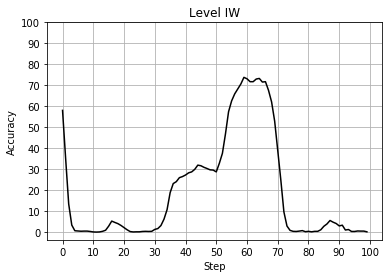

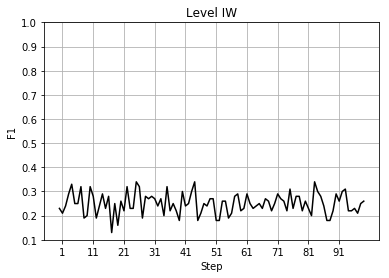

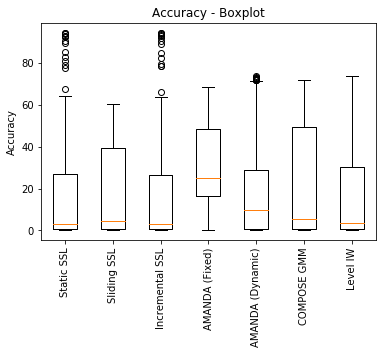

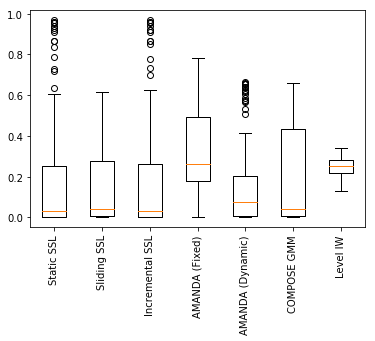

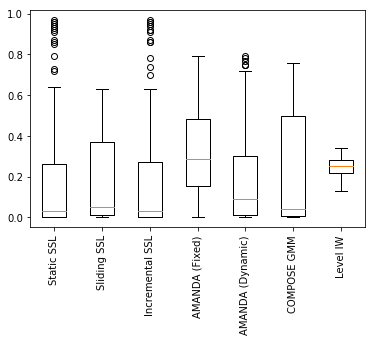

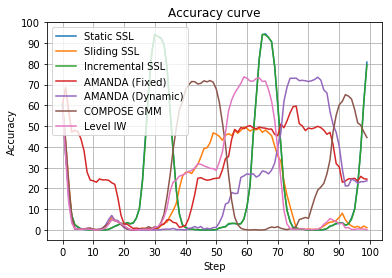

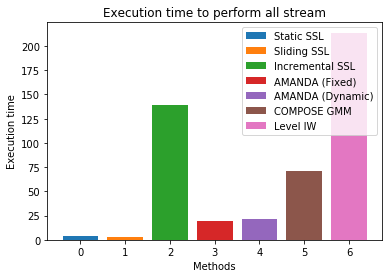

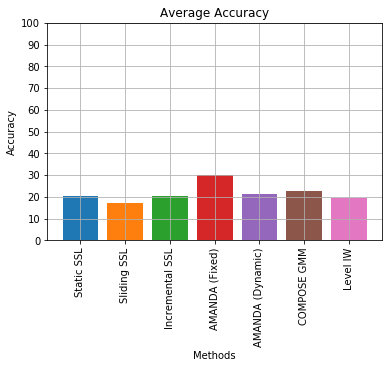

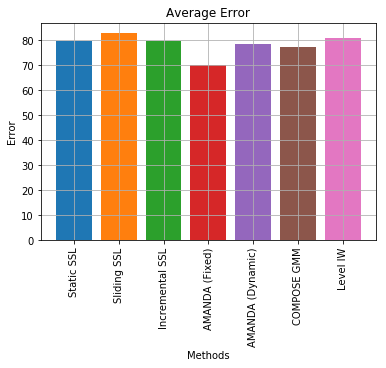

Error reduction: -16.0393456771
Error reduction: -0.311862545112
Error reduction: 47.2520790836
Error reduction: 4.96332182646
Error reduction: 10.9137180292
Error reduction: -5.6772860113


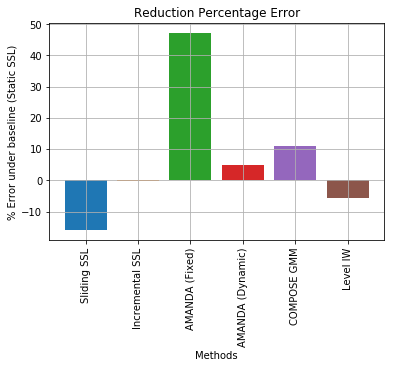

In [1]:
import sys
import os
from pathlib import Path
os.chdir(Path(os.getcwd()).resolve().parents[3])

import setup
from methods import runExperiments
from methods import static_classifier
from methods import amanda_dynamic
from methods import amanda_fixed
from methods import incremental_LN
from methods import deslizante_LN
from methods import compose_gmm_version


class Experiment():
     def __init__(self, method, K=None, excludingPercentage=None, densityFunction=None, clfName=None):
        self.method = method
        self.clfName = clfName
        self.densityFunction=densityFunction
        self.excludingPercentage = excludingPercentage
        self.K_variation = K


def loadLevelResults(path, sep, key, steps):
    originalAccs, F1s, time = setup.loadLevelIwBoxplotResults(path, sep)
    predictions = F1s[key]
    predictions = [ predictions[i::steps] for i in range(steps) ]
    
    return predictions, originalAccs[key], time[key]


def main():
    experiments = {}
    is_windows = sys.platform.startswith('win')
    sep = '\\'

    if is_windows == False:
        sep = '/'

    path = os.getcwd()+sep+'data'+sep
    
    # SETTINGS
    sslClassifier = 'lp' # lp = label propagation, rf = random forests, cl = cluster and label, knn = k-nn, svm = svm
    steps = 100
    poolSize = None
    isBatchMode = True # False = Stream
    isBinaryClassification = False
    isImbalanced = False
    externalResults = []
    
    # Load dataset
    dataValues, dataLabels, description = setup.load4CRE_V2(path, sep)
    
    # Only 5% of initial labeled data - Extreme verification latency scenario
    labeledData = int(0.05*len(dataLabels))

    # Static SSL
    experiments[0] = Experiment(static_classifier, 9, clfName=sslClassifier)
    
    # Sliding SSL
    experiments[1] = Experiment(deslizante_LN, 9, clfName=sslClassifier)
    
    # Incremental SSL
    experiments[2] = Experiment(incremental_LN, 9, clfName=sslClassifier)
    
    # Proposed Method 1 (AMANDA - Fixed core extraction percentage)
    experiments[3] = Experiment(amanda_fixed, 9, 0.9, "kde", sslClassifier)

    # Proposed method 2 (AMANDA - Dynamic core extraction percentage)
    experiments[4] = Experiment(amanda_dynamic, 10, None, "kde", sslClassifier)

    # COMPOSE GMM (Python version)
    experiments[5] = Experiment(compose_gmm_version, 9)
    
    # levelIw matlab results
    predictionsLevelIw, originalAccsLevelIw, timeLevelIw = loadLevelResults(path, sep, '4CRE-V2', steps)
    externalResults.append({"name":"Level IW", "predictions":predictionsLevelIw, "accuracies":originalAccsLevelIw, "time":timeLevelIw})
    
    # Run experiments
    runExperiments.run(dataValues, dataLabels, description, isBinaryClassification, isImbalanced, 
                       experiments, steps, labeledData, isBatchMode, poolSize, externalResults)
    

if __name__ == "__main__":
    main()